In [9]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
!pip install pandas numpy matplotlib

In [2]:
filenames = glob('data*.csv')

In [3]:
dataframes = [pd.read_csv(f, 
                          header=None, 
                          names=["site", "direction", "type", "from", "to", "count"],
                          parse_dates=['from', 'to'],
                          index_col=['from']
                         ) for f in filenames]

In [4]:
df = pd.concat(dataframes)

In [5]:
df[(df.direction == 'IN')]

,site,direction,type,to,count
from,,,,,
2019-08-01 00:00:00,1,IN,FIETSERS,2019-08-01 00:15:00,0.0
2019-08-01 00:15:00,1,IN,FIETSERS,2019-08-01 00:30:00,0.0
2019-08-01 00:30:00,1,IN,FIETSERS,2019-08-01 00:45:00,0.0
2019-08-01 00:45:00,1,IN,FIETSERS,2019-08-01 01:00:00,0.0
2019-08-01 01:00:00,1,IN,FIETSERS,2019-08-01 01:15:00,1.0
...,...,...,...,...,...
2021-02-28 22:45:00,25,IN,FIETSERS,2021-02-28 23:00:00,0.0
2021-02-28 23:00:00,25,IN,FIETSERS,2021-02-28 23:15:00,0.0
2021-02-28 23:15:00,25,IN,FIETSERS,2021-02-28 23:30:00,0.0


In [6]:
grouped = df.groupby('site').resample('1d').agg({'count': np.sum})

<AxesSubplot:xlabel='from'>

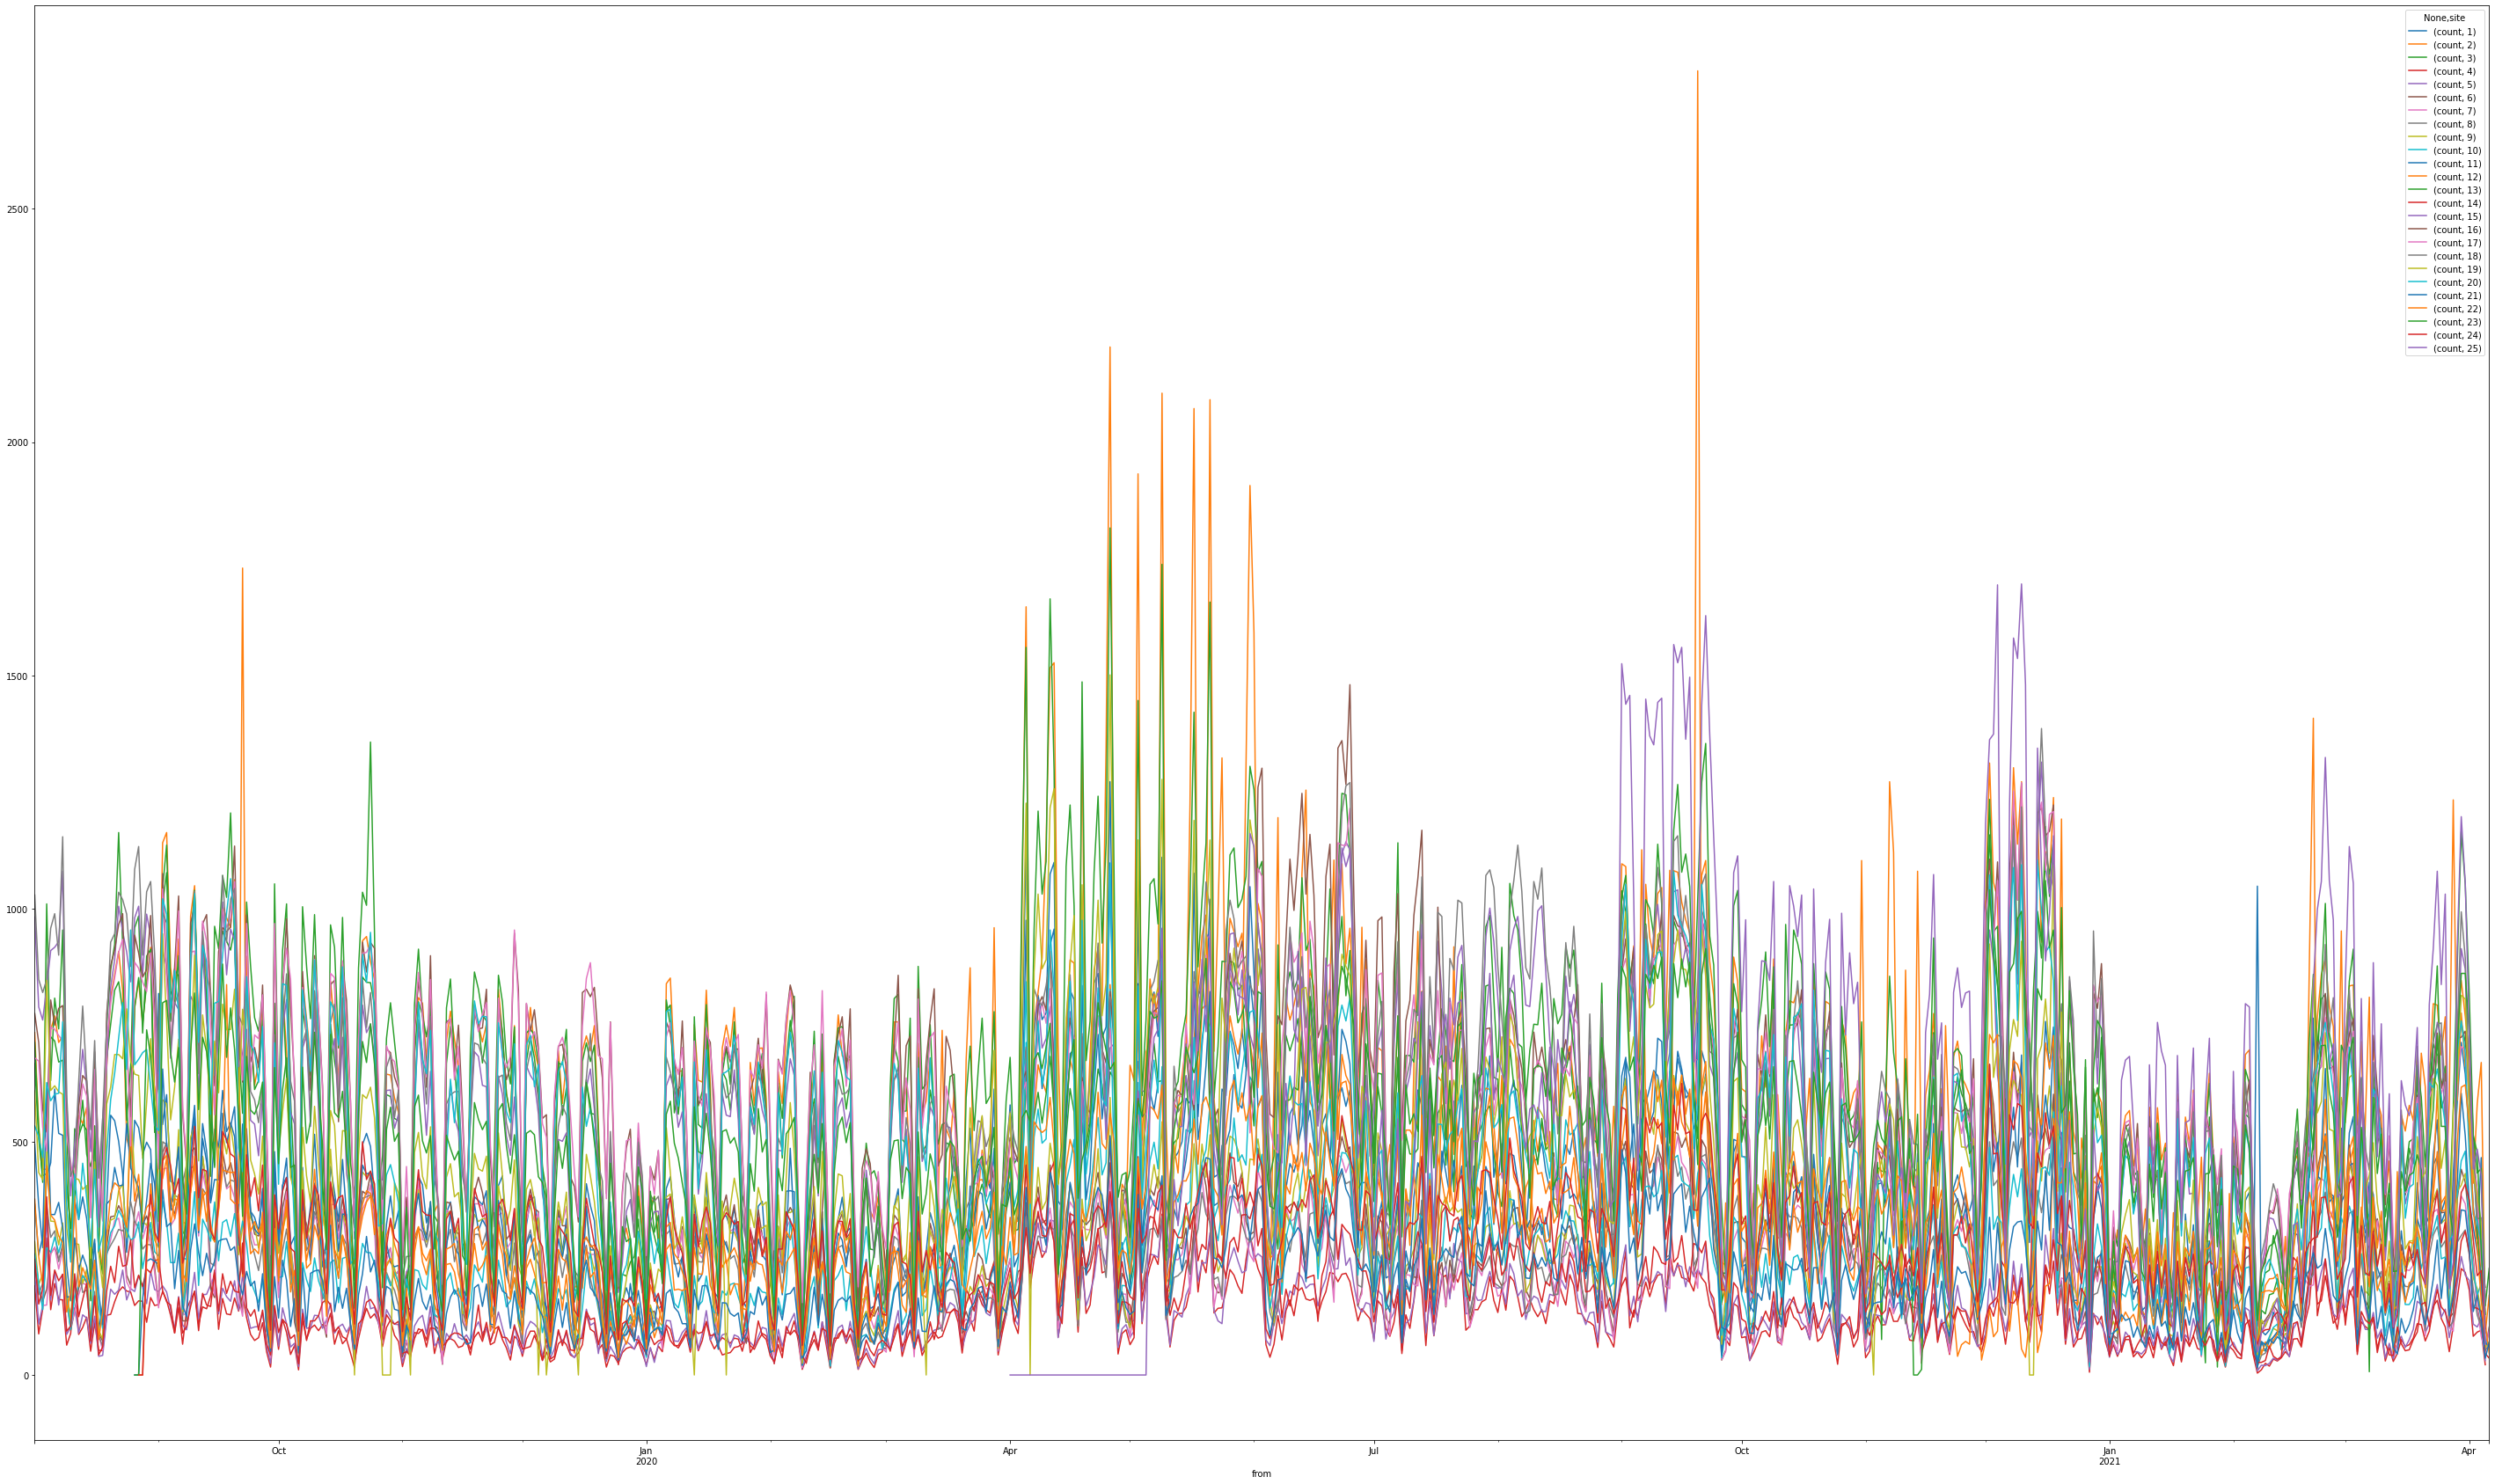

In [7]:
grouped.unstack('site').plot(figsize=(50,30))